In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame()

df = pd.read_excel("XXX.xlsx")

In [2]:
df

,Unnamed: 0,origin,destination,aircraft,airline,code,codeAlt,operation,time,geometry,...,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125
0,0,BOG,MAD,A359,IBE,IB6588,IBE6588,arrival,2022-04-19 11:45:00,"LINESTRING (-26.47 30.2, -26.44 30.22, -26.39 ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,CUN,MAD,A359,EVE,E9814,EVE814,arrival,2022-04-19 10:39:00,"LINESTRING (-18.33 42.9, -18.3 42.89, -18.24 4...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,MEX,MAD,A359,IBE,IB6402,IBE6402,arrival,2022-04-19 11:39:00,"LINESTRING (-30.71 42.95, -30.65 42.96, -30.62...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,MIA,MAD,B789,AEA,UX98,AEA098,arrival,2022-04-19 10:00:00,"LINESTRING (-11.64 44.06, -11.62 44.05, -11.55...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,MEX,MAD,B789,AMX,AM1,AMX001,arrival,2022-04-19 10:33:00,"LINESTRING (-17.89 42.77, -17.81 42.76, -17.77...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,20154,MAD,CDG,BCS3,AFR,AF1001,AFR98SM,departure,2022-05-09 07:23:00,"LINESTRING (-3.57 40.47, -3.57 40.47, -3.57 40...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20156,20155,MAD,BRU,A320,IBE,IB3206,IBE32BV,departure,2022-05-09 07:24:00,"LINESTRING (-3.59 40.49, -3.59 40.49, -3.59 40...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20157,20156,MAD,NaN,A320,IBE,IB3475,IBE3475,departure,2022-05-09 07:26:00,"LINESTRING (-3.59 40.49, -3.59 40.49, -3.59 40...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20158,20157,MAD,DOH,B789,QTR,QR148,QTR27Y,departure,2022-05-09 07:29:00,"LINESTRING (-3.57 40.49, -3.57 40.49, -3.57 40...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


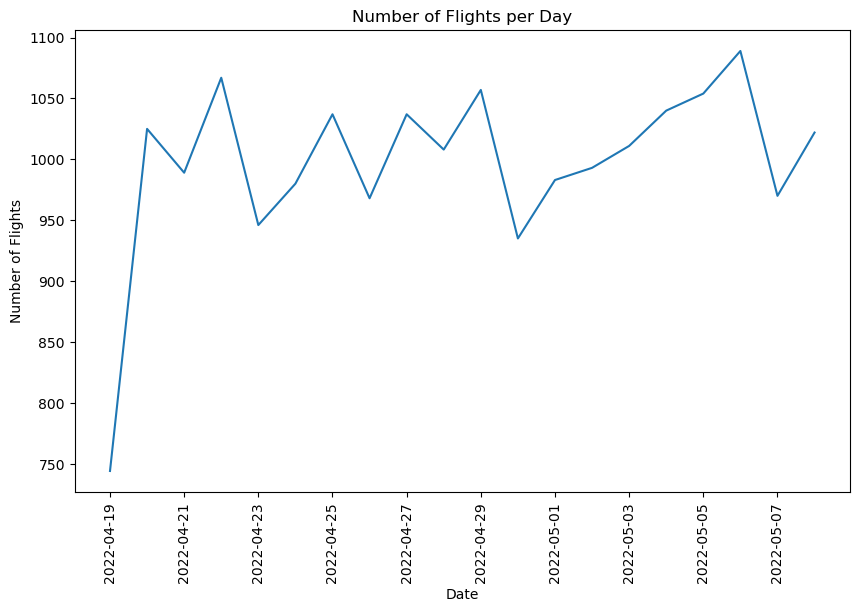

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df['time'] = pd.to_datetime(df['time'])

filtered_df = df[(df['time'].dt.date <= pd.to_datetime('2022-05-08').date()) & (df['time'].dt.date > pd.to_datetime('2022-04-19').date())]

flight_count = filtered_df.groupby(filtered_df['time'].dt.date).size()

flight_count.plot(kind='line', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.title('Number of Flights per Day')
plt.xticks(rotation=90)
plt.show()



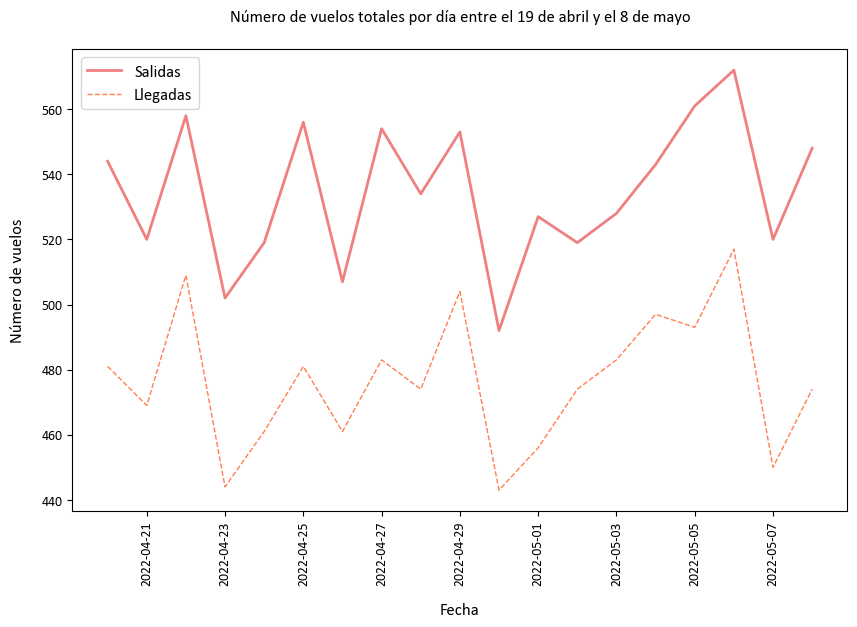

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

df['time'] = pd.to_datetime(df['time'])

filtered_departure = df[(df['time'].dt.date <= pd.to_datetime('2022-05-08').date()) & (df['time'].dt.date > pd.to_datetime('2022-04-19').date()) & (df['operation'] == 'departure')]
filtered_arrival = df[(df['time'].dt.date <= pd.to_datetime('2022-05-08').date()) & (df['time'].dt.date > pd.to_datetime('2022-04-19').date()) & (df['operation'] == 'arrival')]

flight_count_departure = filtered_departure.groupby(filtered_departure['time'].dt.date).size()
flight_count_arrival = filtered_arrival.groupby(filtered_arrival['time'].dt.date).size()

mpl.rc('font', family='Calibri', size=12)

plt.figure(figsize=(10, 6))

plt.margins(x=0.05)

flight_count_departure.plot(kind='line', color='lightcoral', linewidth=2, label='Salidas')

flight_count_arrival.plot(kind='line', color='coral', linewidth=1, linestyle='--', label='Llegadas')

plt.xlabel('Fecha', fontsize=12, labelpad=12)  
plt.ylabel('Número de vuelos', fontsize=12, labelpad=12)  
plt.title('Número de vuelos totales por día entre el 19 de abril y el 8 de mayo', fontsize=12, pad=20) 
plt.xticks(rotation=90, fontsize=10) 
plt.yticks(fontsize=10) 

plt.legend(fontsize=12) 

plt.savefig('flight_count_graph_co.jpg', format='jpg', dpi=300, bbox_inches='tight')

plt.show()

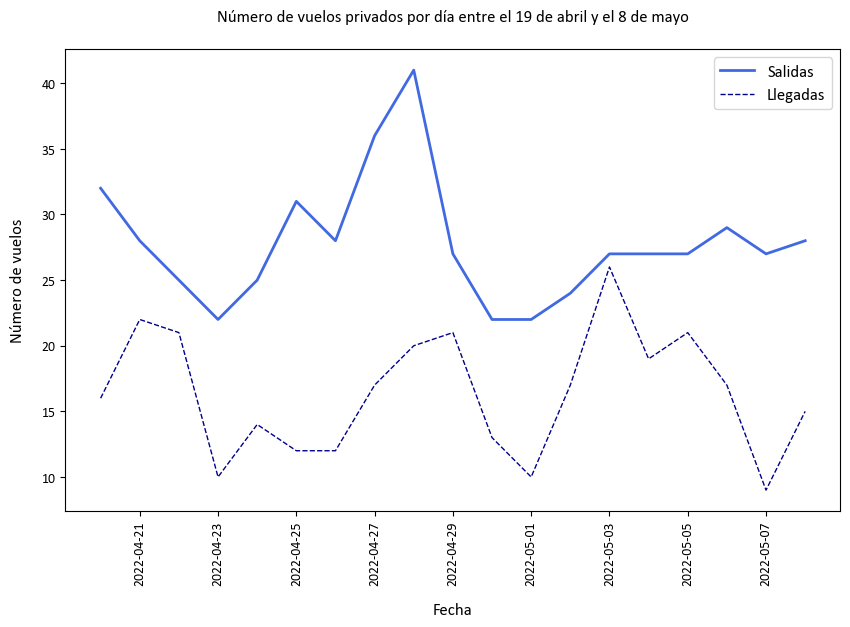

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

df['time'] = pd.to_datetime(df['time'])

filtered_departure = df[(df['time'].dt.date <= pd.to_datetime('2022-05-08').date()) & (df['time'].dt.date > pd.to_datetime('2022-04-19').date())  & (df['airline'].isnull()) & (df['operation'] == 'departure')]
filtered_arrival = df[(df['time'].dt.date <= pd.to_datetime('2022-05-08').date()) & (df['time'].dt.date > pd.to_datetime('2022-04-19').date())  & (df['airline'].isnull()) & (df['operation'] == 'arrival')]

flight_count_departure = filtered_departure.groupby(filtered_departure['time'].dt.date).size()
flight_count_arrival = filtered_arrival.groupby(filtered_arrival['time'].dt.date).size()

mpl.rc('font', family='Calibri', size=12)

plt.figure(figsize=(10, 6))

plt.margins(x=0.05)

flight_count_departure.plot(kind='line', color='royalblue', linewidth=2, label='Salidas')

flight_count_arrival.plot(kind='line', color='darkblue', linewidth=1, linestyle='--', label='Llegadas')

plt.xlabel('Fecha', fontsize=12, labelpad=12)  
plt.ylabel('Número de vuelos', fontsize=12, labelpad=12)  
plt.title('Número de vuelos privados por día entre el 19 de abril y el 8 de mayo', fontsize=12, pad=20) 
plt.xticks(rotation=90, fontsize=10) 
plt.yticks(fontsize=10) 

plt.legend(fontsize=12) 

plt.savefig('flight_count_graph_nonco.jpg', format='jpg', dpi=300, bbox_inches='tight')

plt.show()



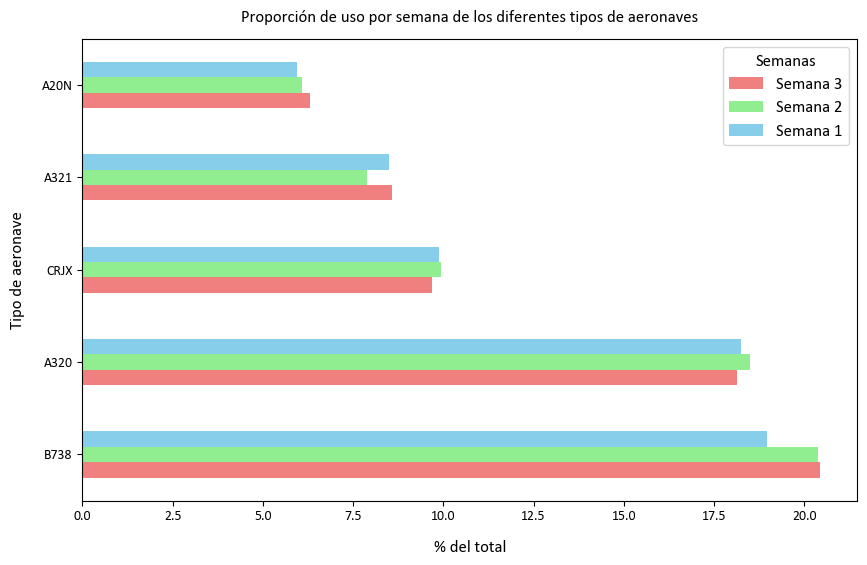

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

semana1 = df[(df['time'] >= '2022-04-19') & (df['time'] <= '2022-04-24')]
semana2 = df[(df['time'] >= '2022-04-25') & (df['time'] <= '2022-05-01')]
semana3 = df[(df['time'] >= '2022-05-02') & (df['time'] <= '2022-05-08')]

total_semana1 = len(semana1)
total_semana2 = len(semana2)
total_semana3 = len(semana3)

porcentaje_semana1 = semana1['aircraft'].value_counts() / total_semana1 * 100
porcentaje_semana2 = semana2['aircraft'].value_counts() / total_semana2 * 100
porcentaje_semana3 = semana3['aircraft'].value_counts() / total_semana3 * 100

top5_semana1 = porcentaje_semana1.head(5)
top5_semana2 = porcentaje_semana2.head(5)
top5_semana3 = porcentaje_semana3.head(5)

data = pd.DataFrame({
    'Semana 3': top5_semana3,
    'Semana 2': top5_semana2,
    'Semana 1': top5_semana1  
})

colores = ['lightcoral', 'lightgreen', 'skyblue'] 

mpl.rc('font', family='Calibri', size=12)

ax = data.plot(kind='barh', figsize=(10, 6), color=colores)

plt.title('Proporción de uso por semana de los diferentes tipos de aeronaves', fontsize=12, pad=12)
plt.xlabel('% del total', fontsize=12, labelpad=12)
plt.ylabel('Tipo de aeronave', fontsize=12, labelpad=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(title='Semanas', fontsize=12)

plt.savefig('grafico_aeronaves_porcentaje.jpg', format='jpg', dpi=300, bbox_inches='tight')

plt.show()
